### Fashion MNIST - made by Zalando

In [64]:
pip install python-mnist

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [65]:
#import libraries

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

#Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout

from mnist import MNIST
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [66]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [67]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [68]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


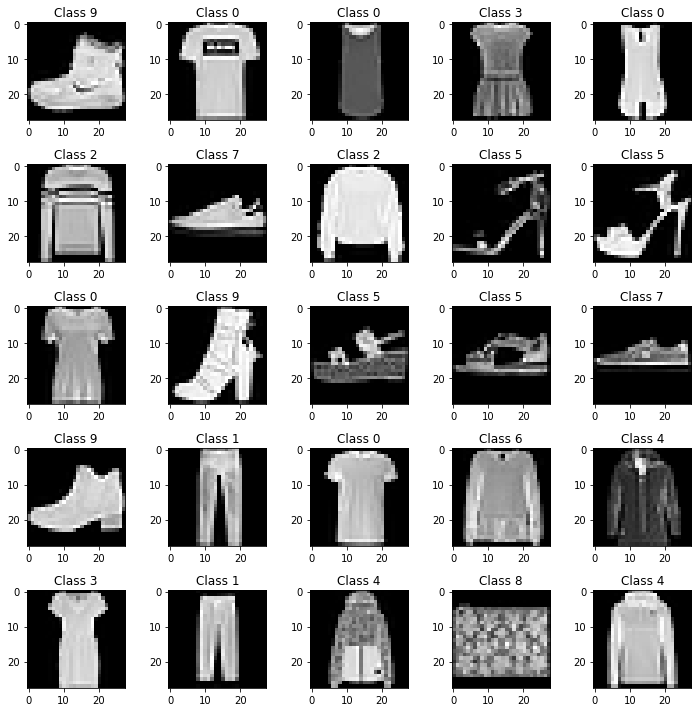

In [69]:
fig = plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[idx]))
    
plt.tight_layout()

In [70]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Label Description
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

### Przygotowujemy dane
Przed trenowaniem modelu (sieci neuronowej) musimy wykonać trzy kroki:

1. Spłaszczyć dane.
2. Znormalizować wartości.
3. Przygotować macierz wyjściową dla odpowiedzi.

In [71]:
#Splaszczenie

if len(X_train.shape) == 3:
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [72]:
#skalujemy od 0 do 1
if np.max(X_train) > 1: X_train /= 255
if np.max(X_test) > 1: X_test /= 255

In [73]:
#one-hot encoding dla zmiennej docelowej - Tensorflow
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [75]:
num_classes = y_test.shape[1]

In [76]:
num_classes 

10

### Architektura (MLP)
Bardzo prostą sieć, na którą będą się składać 3 warstwy:

1. Warstwa wejściowa.
2. Warstwa ukryta.
3. Warstwa wyjściowa.

In [77]:
num_pixels

784

In [78]:
model = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train, y_train,
          batch_size=1024, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/20
59/59 - 4s - loss: 0.6860 - accuracy: 0.7707 - val_loss: 0.4969 - val_accuracy: 0.8279
Epoch 2/20
59/59 - 3s - loss: 0.4419 - accuracy: 0.8472 - val_loss: 0.4482 - val_accuracy: 0.8448
Epoch 3/20
59/59 - 3s - loss: 0.4005 - accuracy: 0.8609 - val_loss: 0.4177 - val_accuracy: 0.8508
Epoch 4/20
59/59 - 3s - loss: 0.3748 - accuracy: 0.8694 - val_loss: 0.4111 - val_accuracy: 0.8537
Epoch 5/20
59/59 - 2s - loss: 0.3485 - accuracy: 0.8782 - val_loss: 0.3939 - val_accuracy: 0.8625
Epoch 6/20
59/59 - 3s - loss: 0.3366 - accuracy: 0.8813 - val_loss: 0.3720 - val_accuracy: 0.8668
Epoch 7/20
59/59 - 3s - loss: 0.3191 - accuracy: 0.8876 - val_loss: 0.3640 - val_accuracy: 0.8715
Epoch 8/20
59/59 - 2s - loss: 0.3077 - accuracy: 0.8905 - val_loss: 0.3633 - val_accuracy: 0.8735
Epoch 9/20
59/59 - 2s - loss: 0.2961 - accuracy: 0.8941 - val_loss: 0.3521 - val_accuracy: 0.8768
Epoch 10/20
59/59 - 3s - loss: 0.2887 - accuracy: 0.8968 - val_loss: 0.3435 - val_accuracy: 0.8796
Epoch 11/20
59/59 -

### Testowanie

In [80]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.3202323317527771
Test accuracy: 0.887499988079071
MLP Error: 11.25%


### Model 2 - jedna warstwa wiecej

In [82]:
model2 = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [83]:
model2.fit(X_train, y_train,
          batch_size=1024, epochs=10, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
59/59 - 3s - loss: 2.3434 - accuracy: 0.0736 - val_loss: 2.3296 - val_accuracy: 0.0812
Epoch 2/10
59/59 - 2s - loss: 2.3194 - accuracy: 0.0857 - val_loss: 2.3057 - val_accuracy: 0.0982
Epoch 3/10
59/59 - 2s - loss: 2.2955 - accuracy: 0.1021 - val_loss: 2.2818 - val_accuracy: 0.1141
Epoch 4/10
59/59 - 3s - loss: 2.2714 - accuracy: 0.1254 - val_loss: 2.2579 - val_accuracy: 0.1405
Epoch 5/10
59/59 - 3s - loss: 2.2473 - accuracy: 0.1544 - val_loss: 2.2339 - val_accuracy: 0.1735
Epoch 6/10
59/59 - 2s - loss: 2.2230 - accuracy: 0.1902 - val_loss: 2.2097 - val_accuracy: 0.2120
Epoch 7/10
59/59 - 2s - loss: 2.1986 - accuracy: 0.2355 - val_loss: 2.1852 - val_accuracy: 0.2639
Epoch 8/10
59/59 - 3s - loss: 2.1738 - accuracy: 0.2835 - val_loss: 2.1605 - val_accuracy: 0.3184
Epoch 9/10
59/59 - 3s - loss: 2.1488 - accuracy: 0.3335 - val_loss: 2.1354 - val_accuracy: 0.3600
Epoch 10/10
59/59 - 2s - loss: 2.1234 - accuracy: 0.3775 - val_loss: 2.1099 - val_accuracy: 0.3985


In [84]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 2.109896421432495
Test accuracy: 0.398499995470047
MLP Error: 60.15%


### Model 3 -  z dropout (walczy z przeuczeniem)

In [85]:
model3 = Sequential([
    Dense(512, input_dim=num_pixels, activation='relu'),
    Dropout(0.5), #wylącz 50% neuronów
    Dense(256, activation='relu'),
    Dropout(0.2), #wylącz 20% neuronów
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
])
model3.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [86]:
model3.fit(X_train, y_train,
          batch_size=1024, epochs=10, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
59/59 - 4s - loss: 2.3478 - accuracy: 0.0961 - val_loss: 2.3160 - val_accuracy: 0.0990
Epoch 2/10
59/59 - 3s - loss: 2.3284 - accuracy: 0.1039 - val_loss: 2.2955 - val_accuracy: 0.1043
Epoch 3/10
59/59 - 3s - loss: 2.3103 - accuracy: 0.1110 - val_loss: 2.2750 - val_accuracy: 0.1110
Epoch 4/10
59/59 - 3s - loss: 2.2902 - accuracy: 0.1201 - val_loss: 2.2545 - val_accuracy: 0.1213
Epoch 5/10
59/59 - 3s - loss: 2.2720 - accuracy: 0.1303 - val_loss: 2.2340 - val_accuracy: 0.1363
Epoch 6/10
59/59 - 3s - loss: 2.2532 - accuracy: 0.1396 - val_loss: 2.2135 - val_accuracy: 0.1562
Epoch 7/10
59/59 - 3s - loss: 2.2332 - accuracy: 0.1538 - val_loss: 2.1931 - val_accuracy: 0.1783
Epoch 8/10
59/59 - 3s - loss: 2.2136 - accuracy: 0.1684 - val_loss: 2.1726 - val_accuracy: 0.2065
Epoch 9/10
59/59 - 3s - loss: 2.1980 - accuracy: 0.1838 - val_loss: 2.1522 - val_accuracy: 0.2389
Epoch 10/10
59/59 - 3s - loss: 2.1788 - accuracy: 0.1944 - val_loss: 2.1318 - val_accuracy: 0.2799


In [87]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("MLP Error: %.2f%%" % (100-score[1]*100))

Test loss: 2.1318325996398926
Test accuracy: 0.2799000144004822
MLP Error: 72.01%
